In [1]:
#Import all necessary libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import time
import math

#Import all libraries required for classification using Gaussian Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, roc_curve
from sklearn.naive_bayes import GaussianNB

In [2]:
plt.rcParams['figure.figsize'] = (8, 8)

In [3]:
#Load the dataset into a dataframe
data = pd.read_csv("D:\Important\SEM 6\DSCI\data.csv")  

In [4]:
df=data
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [5]:
#Create a new dataframe 'x' that contains only the required features after dropping the unnecessary features

y = data.diagnosis                           
drop_cols = ['Unnamed: 32','id','diagnosis']
x = data.drop(drop_cols,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
data["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
#This df will be used to plot pairplots

drop_cols = ['Unnamed: 32','id']
df = df.drop(drop_cols,axis = 1 )
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [9]:
#Checking if any feature has null values

x.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
#Showing basic statistics of each feature
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


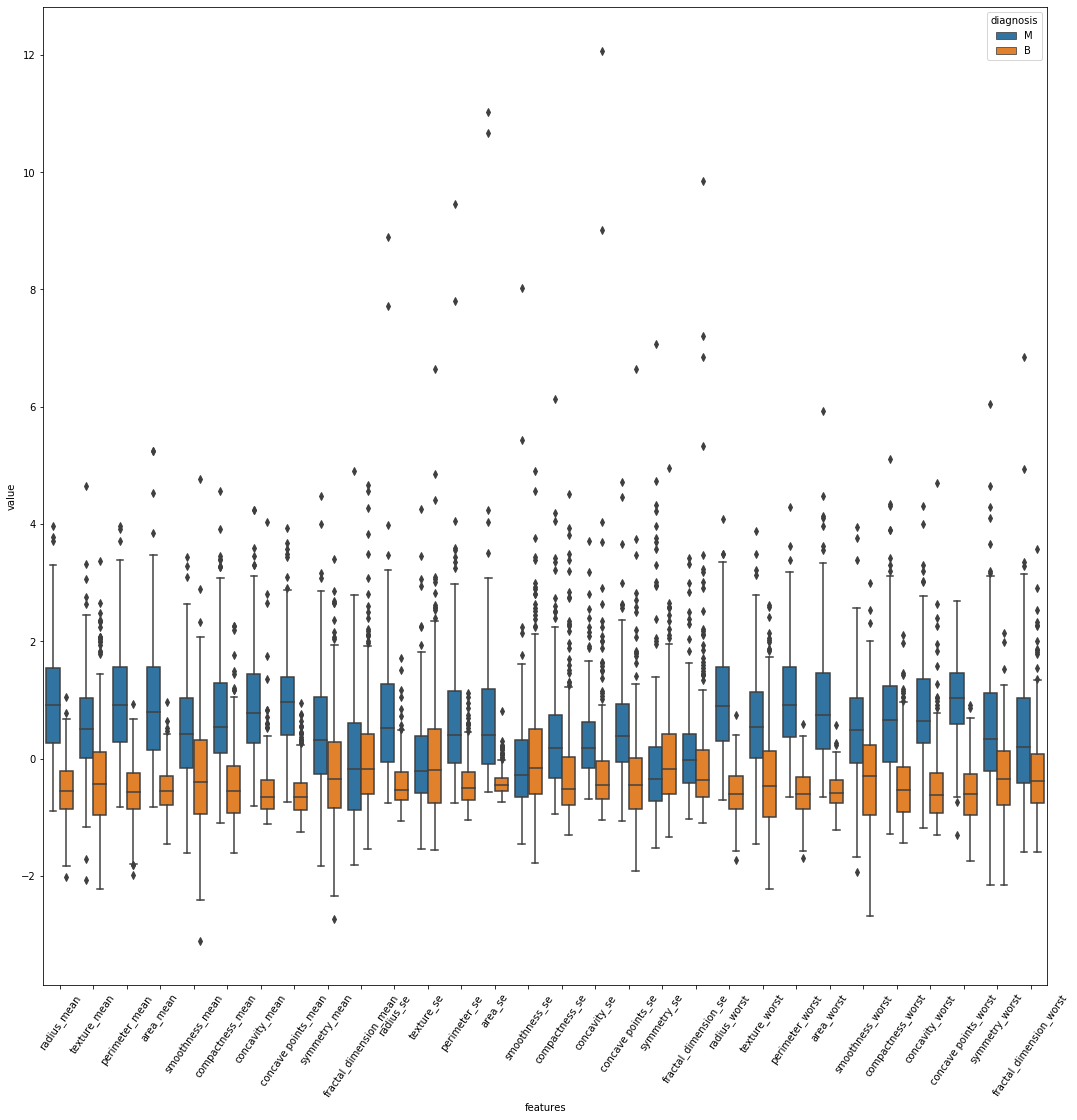

In [11]:
#Box plot of all the features for outliers analysis. With this plot we can see which features have the most scattered outliers.
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              
data = pd.concat([y,data_n_2.iloc[:,:]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(18,18))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=55);

In [12]:
#Finding outliers
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)

#Interquartile range of each coloumn
IQR = Q3 - Q1
print(IQR)

radius_mean                  4.080000
texture_mean                 5.630000
perimeter_mean              28.930000
area_mean                  362.400000
smoothness_mean              0.018930
compactness_mean             0.065480
concavity_mean               0.101140
concave points_mean          0.053690
symmetry_mean                0.033800
fractal_dimension_mean       0.008420
radius_se                    0.246500
texture_se                   0.640100
perimeter_se                 1.751000
area_se                     27.340000
smoothness_se                0.002977
compactness_se               0.019370
concavity_se                 0.026960
concave points_se            0.007072
symmetry_se                  0.008320
fractal_dimension_se         0.002310
radius_worst                 5.780000
texture_worst                8.640000
perimeter_worst             41.290000
area_worst                 568.700000
smoothness_worst             0.029400
compactness_worst            0.191900
concavity_wo

In [13]:
#Printing number of outliers in each coloumn 
print(((x < (Q1 - 1.5 * IQR)) | (x > (Q3 + 1.5 * IQR))).sum())

radius_mean                14
texture_mean                7
perimeter_mean             13
area_mean                  25
smoothness_mean             6
compactness_mean           16
concavity_mean             18
concave points_mean        10
symmetry_mean              15
fractal_dimension_mean     15
radius_se                  38
texture_se                 20
perimeter_se               38
area_se                    65
smoothness_se              30
compactness_se             28
concavity_se               22
concave points_se          19
symmetry_se                27
fractal_dimension_se       28
radius_worst               17
texture_worst               5
perimeter_worst            15
area_worst                 35
smoothness_worst            7
compactness_worst          16
concavity_worst            12
concave points_worst        0
symmetry_worst             23
fractal_dimension_worst    24
dtype: int64


In [14]:
#Removing the outliers
x1 = x[~((x < (Q1 - 1.5 * IQR)) |(x > (Q3 + 1.5 * IQR))).any(axis=1)]
x1.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,...,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,13.376209,18.505879,86.403266,570.547990,0.093271,0.086260,0.060442,0.035902,0.173639,0.061211,...,15.087623,24.723015,98.640477,728.471608,0.128684,0.211521,0.213448,0.096333,0.279092,0.079529
std,2.484104,3.911148,16.841597,222.883241,0.012066,0.034979,0.049068,0.025625,0.020819,0.005015,...,3.232713,5.635779,22.129399,329.649485,0.020253,0.107702,0.147218,0.049968,0.043539,0.012479
min,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.116700,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.178300,0.055210
25%,11.710000,15.702500,75.065000,420.350000,0.084520,0.059592,0.025627,0.018640,0.159000,0.057337,...,13.015000,20.385000,83.922500,516.025000,0.113900,0.136100,0.104825,0.061493,0.247725,0.070195
50%,12.995000,18.175000,84.065000,518.300000,0.092385,0.079455,0.045580,0.028295,0.172250,0.060855,...,14.395000,24.585000,93.905000,632.500000,0.128900,0.188300,0.181100,0.084985,0.275750,0.078030
75%,14.640000,20.755000,94.730000,664.200000,0.101750,0.108975,0.083573,0.049478,0.188500,0.064213,...,16.457500,28.435000,109.775000,830.575000,0.141775,0.265575,0.304350,0.128700,0.307325,0.086570
max,20.590000,29.810000,137.800000,1320.000000,0.125700,0.202200,0.254500,0.125900,0.245900,0.078180,...,24.560000,40.540000,166.400000,1872.000000,0.187800,0.611000,0.772700,0.254300,0.412800,0.120500


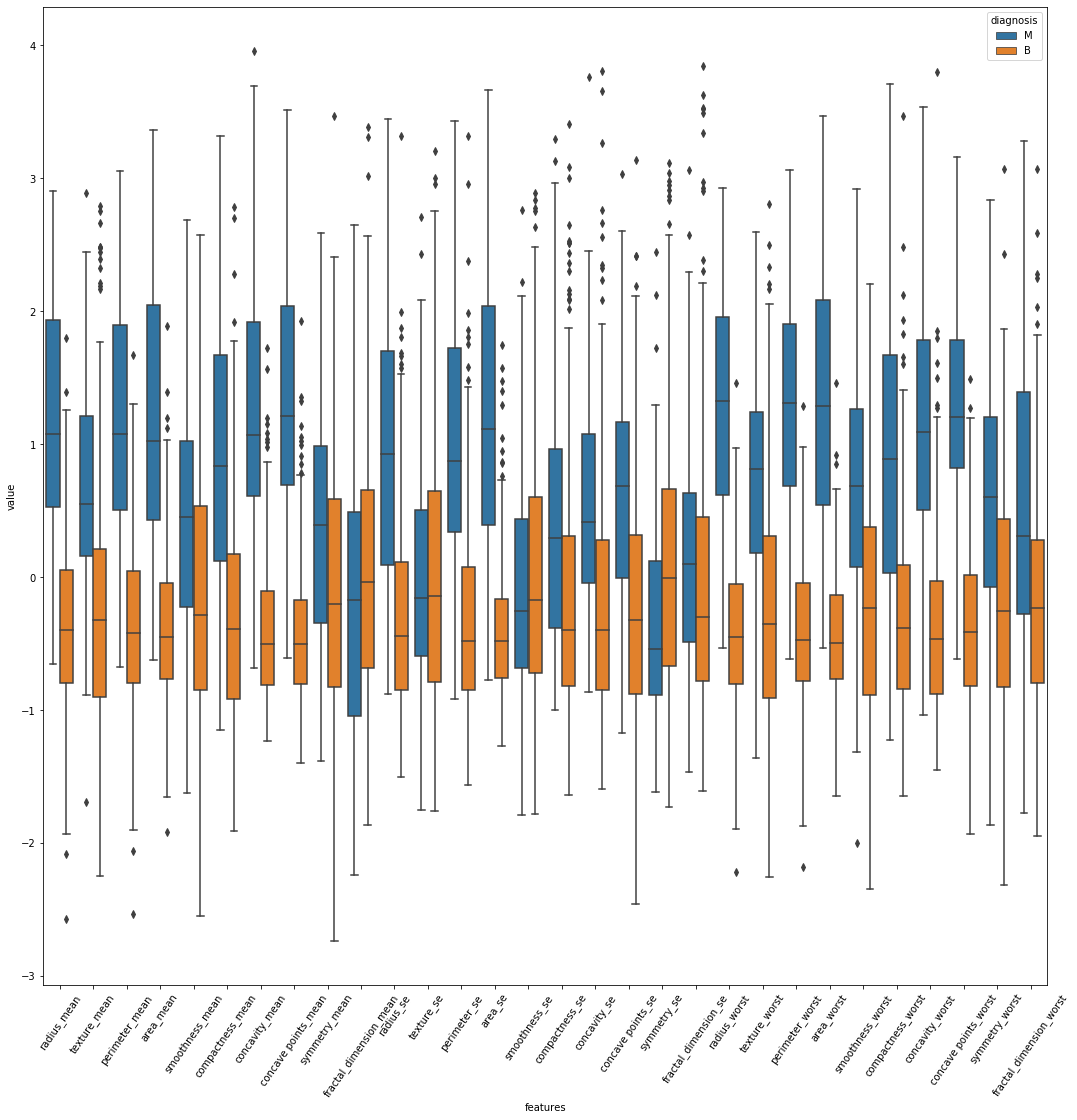

In [15]:
#Box plot of all the features after removing outliers. Here we can see that all the outliers have been removed and we hae a more condensed box plot.
data_dia = y
data = x1
data_n_2 = (data - data.mean()) / (data.std())              
data = pd.concat([y,data_n_2.iloc[:,:]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(18,18))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=55);

Number of Benign:  357
Number of Malignant :  212


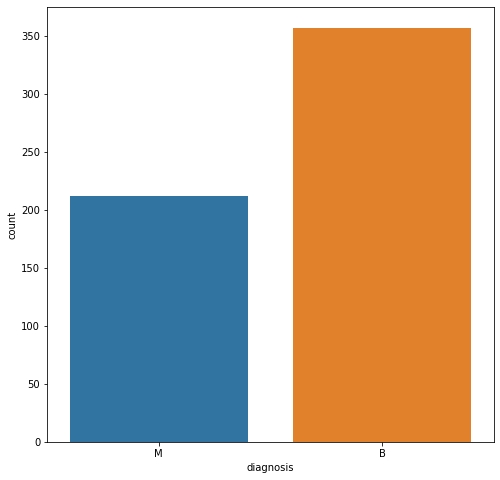

In [16]:
#Plotting a simple bar graph that shows the number of benign tumours vs number of malignant ones in the dataset
ax = sns.countplot(y,label="Count")
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

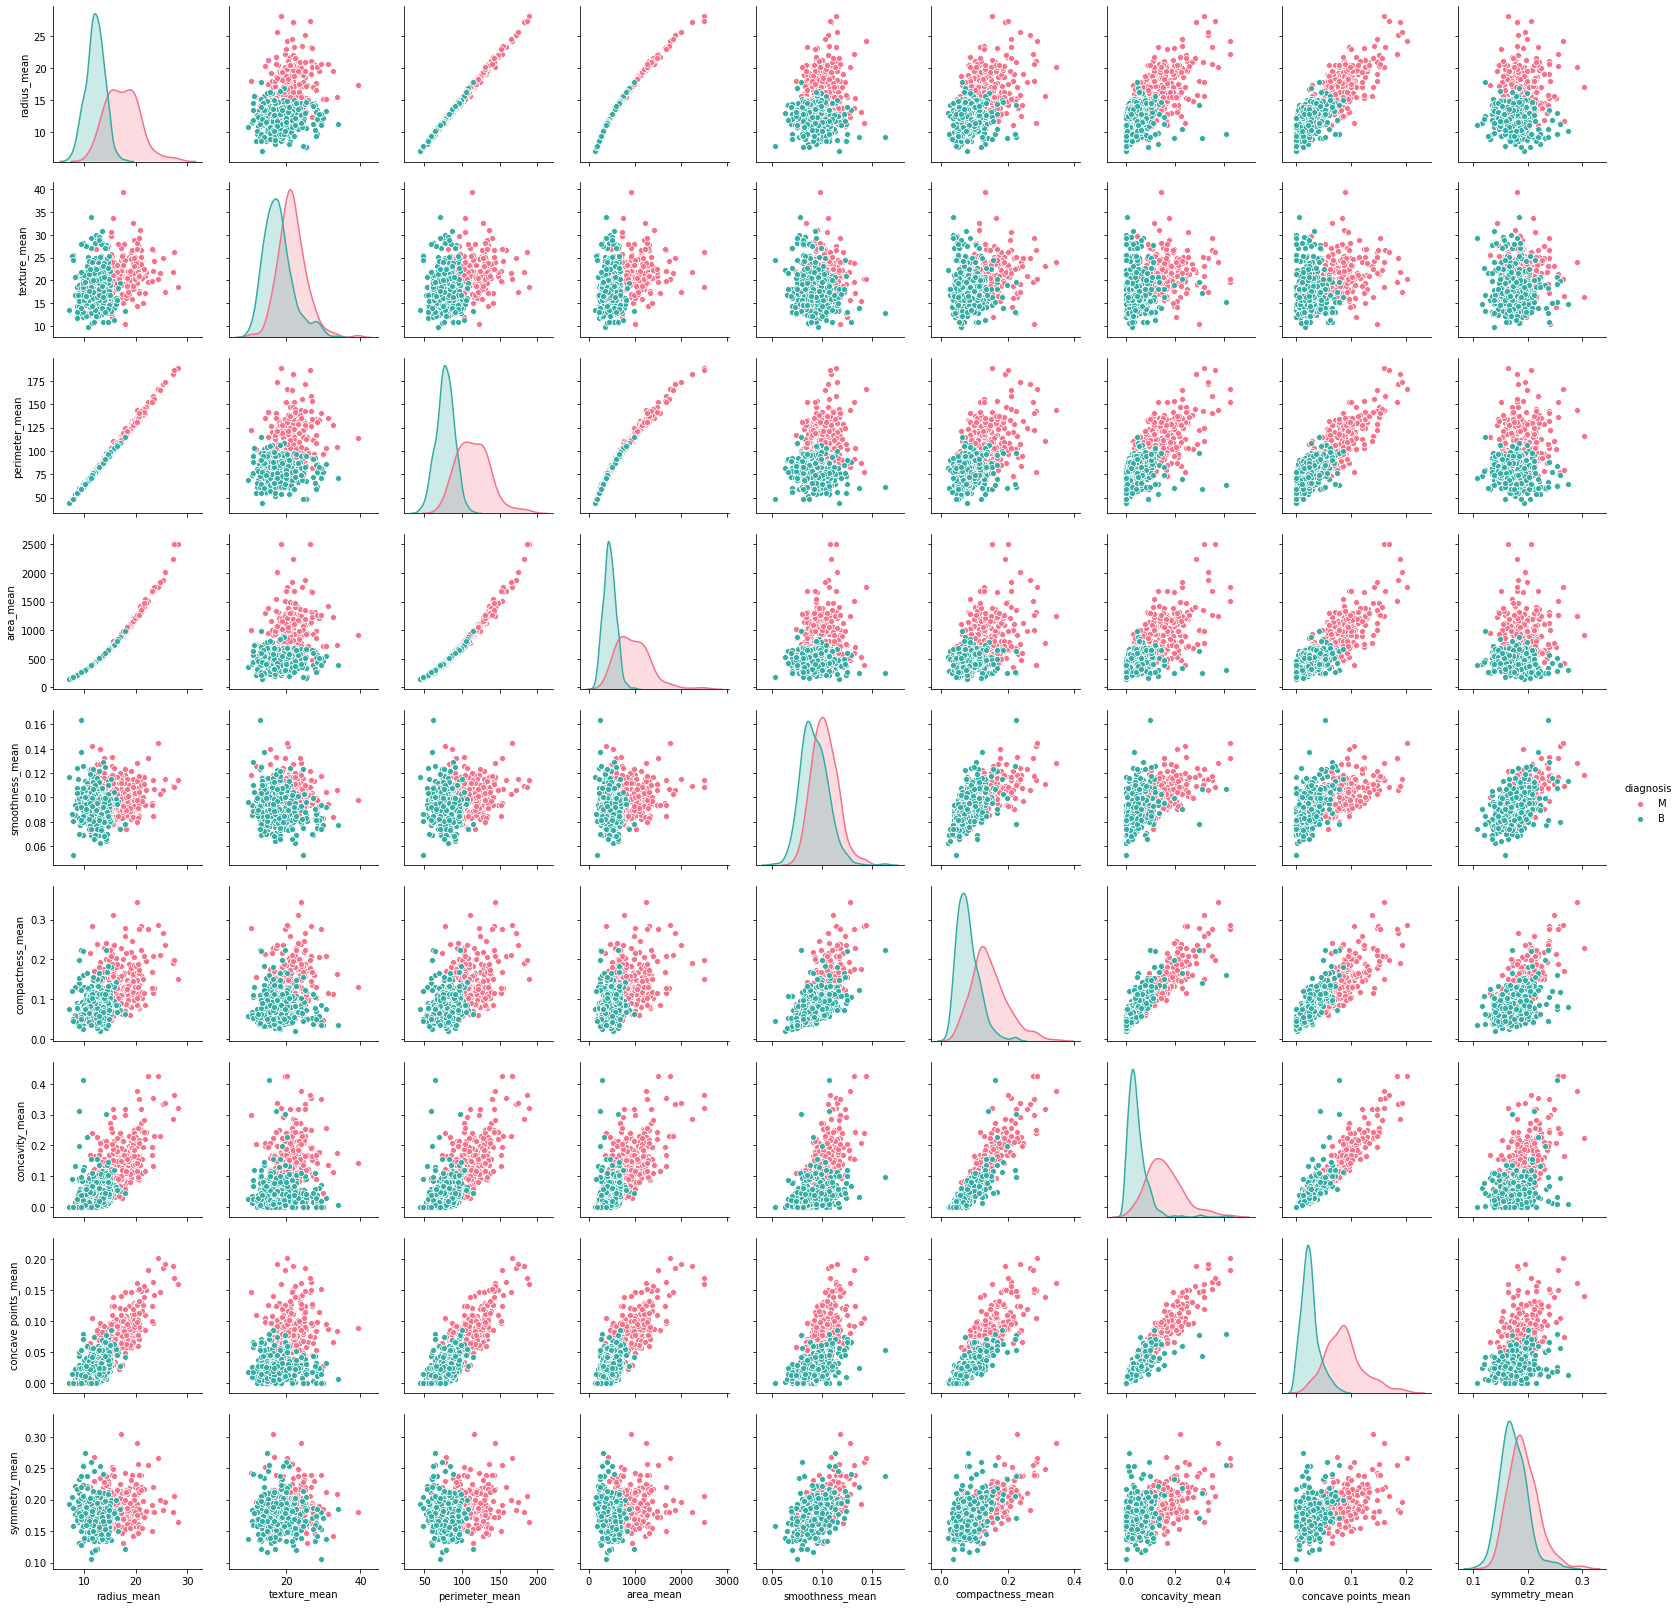

In [17]:
#Plotting a pairplot of first 10 features to visualise the relationship between features.
sns.pairplot(df.iloc[:,:10],hue='diagnosis',palette = 'husl')

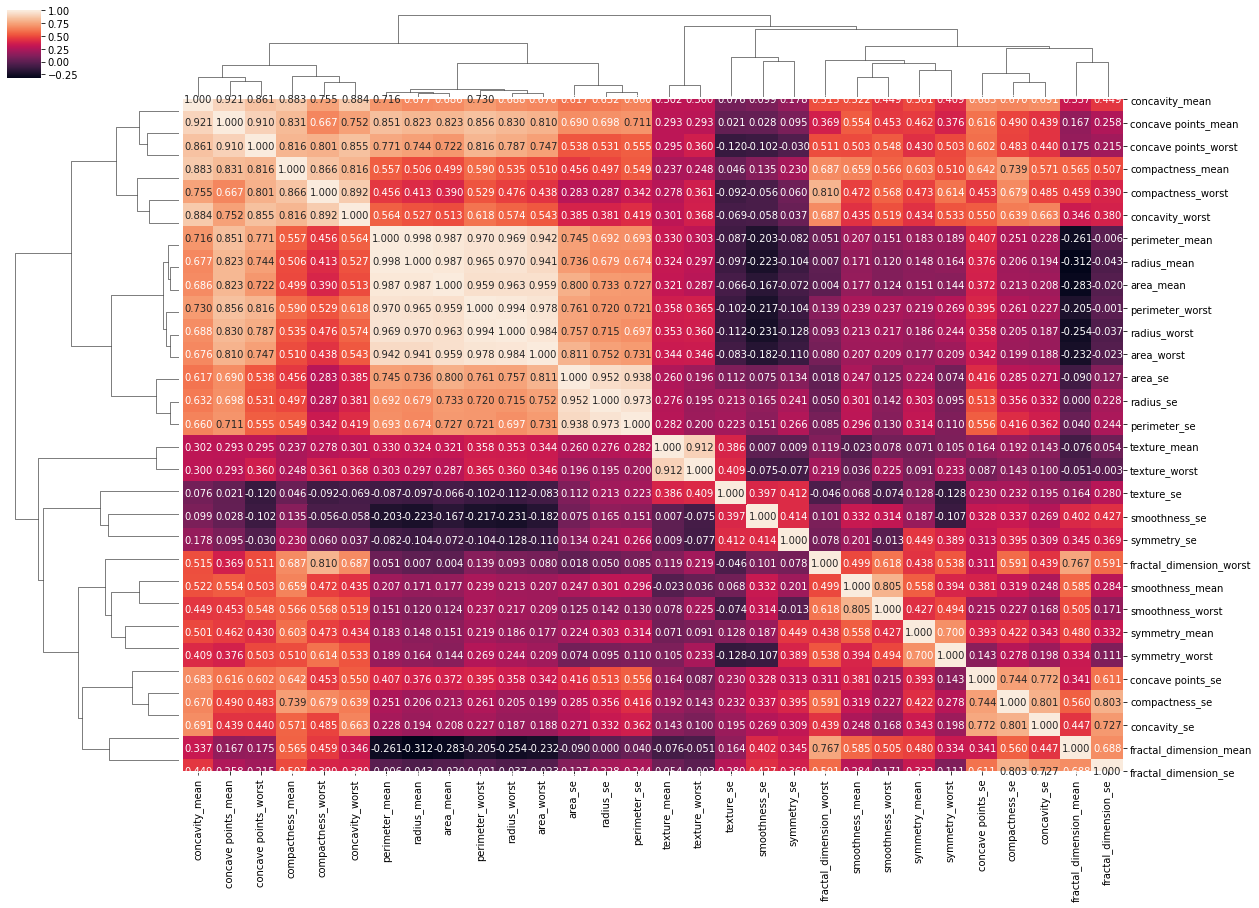

In [18]:
#Show the correlation matrix that measures both the strength and direction of the linear relationship between two variables
corr = x.corr()
corr.style.background_gradient(cmap='PuBu')
sns.clustermap(corr,annot=True,fmt=".3f",figsize=(20,14))

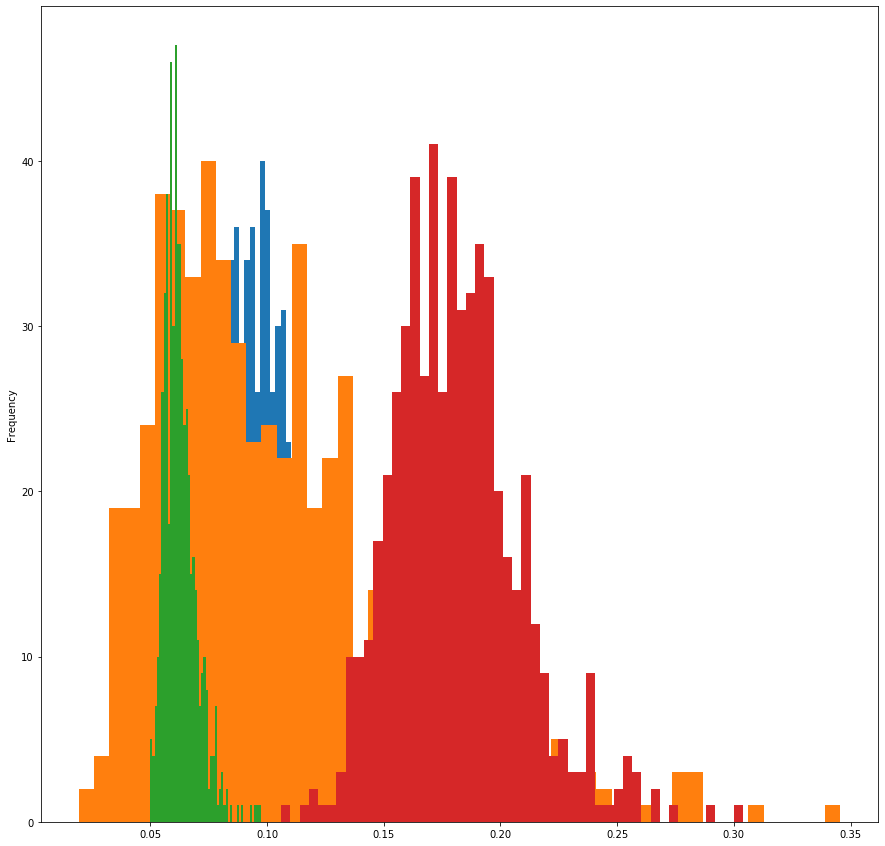

In [19]:
#Plot histogram of 4 important features

x.smoothness_mean.plot(kind = 'hist', bins = 50, figsize = (15,15))
x.compactness_mean.plot(kind = 'hist', bins = 50, figsize = (15,15))
x.fractal_dimension_mean.plot(kind = 'hist', bins = 50, figsize = (15,15))
x.symmetry_mean.plot(kind = 'hist', bins = 50, figsize = (15,15))

plt.show()

In [20]:
#x_test

# Evaluating the Effectiveness of the machine learning Algorithm 

In [21]:
#This function returns a list of all the evaluation parameters for a given training data percentage 

def evaluate_algo(x,y,value):
    
    #Import all libraries required for classification using Gaussian Naive Bayes
    
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import f1_score,confusion_matrix
    from sklearn.metrics import accuracy_score, classification_report, roc_curve
    from sklearn.naive_bayes import GaussianNB
    
    #Create variable t_size to store the value of the current training data percentage
    t_size = (100-int(value))/100  
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=t_size, random_state=42) #Create and split dataset into training and testing sets based on t_size

    #Fit our training model into the Gaussian classifier
    classifier = GaussianNB()
    classifier.fit(x_train,y_train)

    #Store the predicted output of the testing feature set in variable 'y_pred'
    y_pred = classifier.predict(x_test)
    
    #Make and store confusion matrix
    cm = confusion_matrix(y_test,y_pred)
    
    #Storing the values of true positive(tp),true negative(tn),false positive(fp) and false negative(fn)
    tn,fp,fn,tp = [(cm[i,j]) for i in range(len(cm)) for j in range(len(cm))]
    p = cm[1,0]+cm[1,1]
    n = cm[0,0]+cm[0,1]
    
    #Calculating the parameters required
    accuracy = (tp + tn)/(tp + tn + fp + fn)
    precision = tp/(fp + tp)
    recall = tp/(fn + tp)
    f1_measure = 2*(precision*recall)/(precision+recall)
    sensitivity = tp/p
    specificity = tn/n
    fpr = fp/n                                                            #fpr = flase positive rate
    fnr = fn/p                                                            #fnr = false negative rate
    npv = tn/(tn+fn)                                                      #npv = negative predictive values 
    fdr = fp/(fp+tp)                                                      #fdr = false discovery rate
    mcc = ((tp*tn)-(fp*fn))/math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))    #mcc = matthews' correlation coefficient
    
    #Forming a list that stores all the parameters
    list_values = [value,accuracy,precision,recall,f1_measure,sensitivity,specificity,fpr,fnr,npv,fdr,mcc]
    
    return list_values                                                    #Returning list of parameters

### Graphically evaluating the algorithm for different traning data percentages

In [22]:
#This function returns a combined list of all the evaluation parameters for different training data percentages calculated from the above function

def compute_values(x,y,train_list):
    final_list = []
    for i in train_list:
        final_list.append(evaluate_algo(x,y,i))            #Append list of parameters for each training data percentage to final_list
    return final_list                                      #Return final_list

training_per = ["70","80","90"]                            #List containing training data percentages
evaluation_list = compute_values(x,y,training_per)         #evaluation list is a list of lists containing all the parameters for each training data percentage

In [23]:
#This funtion builds the dataframe with the evaluation parameter list obtained for all training data percentages 

def build_df(evaluaton_list,column_list):
    evaluation_df = pd.DataFrame(evaluation_list,columns = column_list)
    
    return evaluation_df                               #Returning the data frame containing all information

column_list = ["training percentage","accuracy","precision","recall","f1-measure","sensitivity","specificity","false positive rate","false negative rate","negative predictive values","false discovery rate","matthews'Correlation coefficient"]
evaluation_df = build_df(evaluation_list,column_list)  #evaluation_df is the dataframe that contains all the info we need about parameters as columns and training percentage as rows

In [24]:
#Print evaluation_df
evaluation_df

,training percentage,accuracy,precision,recall,f1-measure,sensitivity,specificity,false positive rate,false negative rate,negative predictive values,false discovery rate,matthews'Correlation coefficient
0,70,0.941520,0.934426,0.904762,0.919355,0.904762,0.962963,0.037037,0.095238,0.945455,0.065574,0.873782
1,80,0.973684,1.000000,0.930233,0.963855,0.930233,1.000000,0.000000,0.069767,0.959459,0.000000,0.944733
2,90,0.982456,1.000000,0.941176,0.969697,0.941176,1.000000,0.000000,0.058824,0.975610,0.000000,0.958238


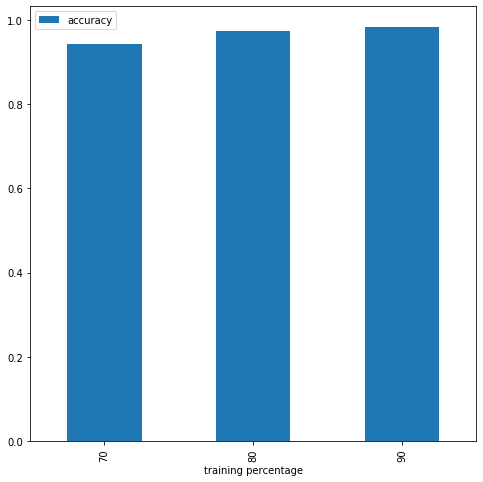

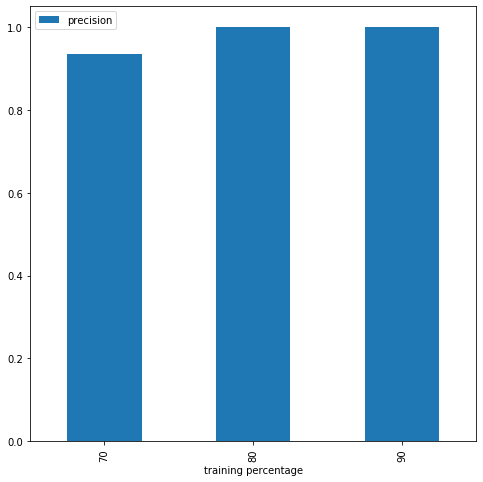

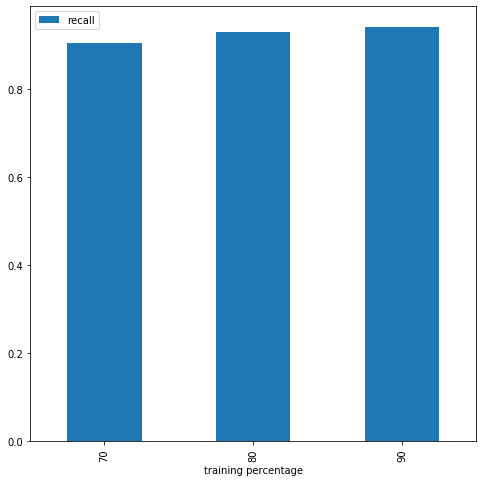

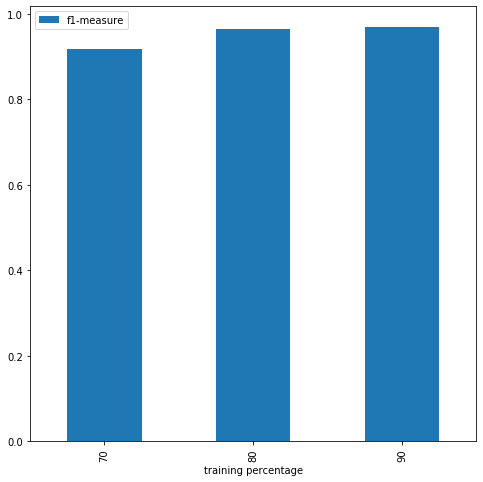

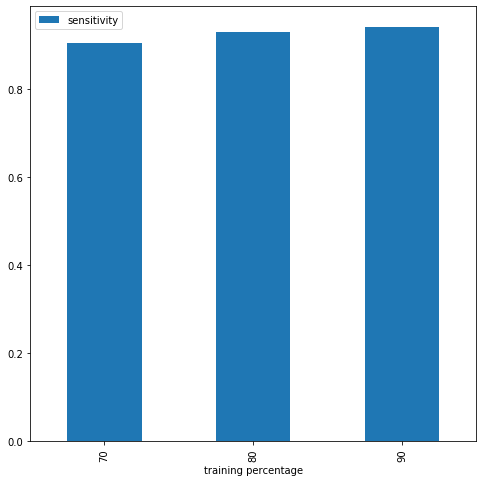

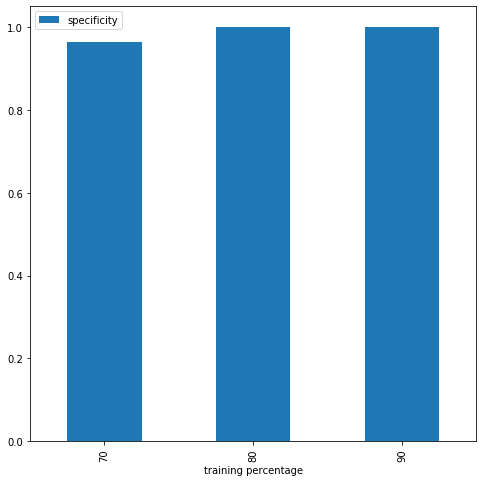

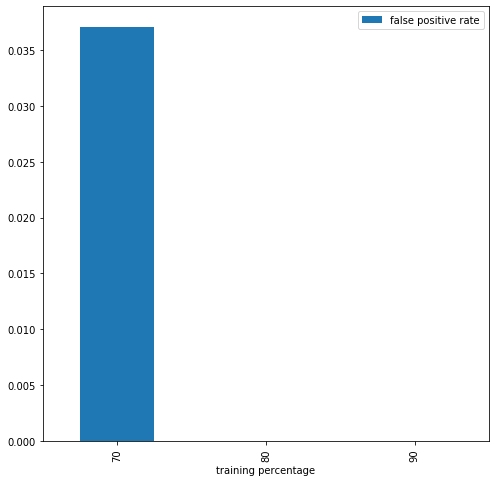

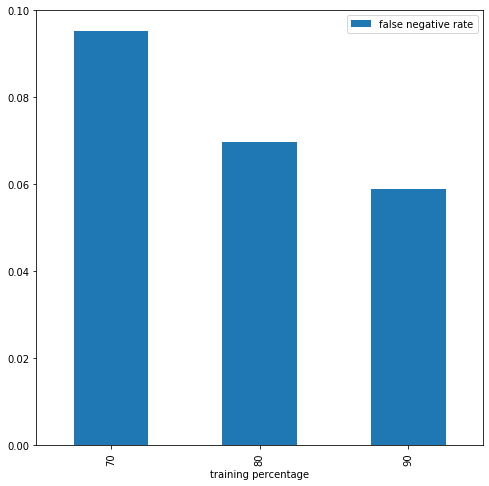

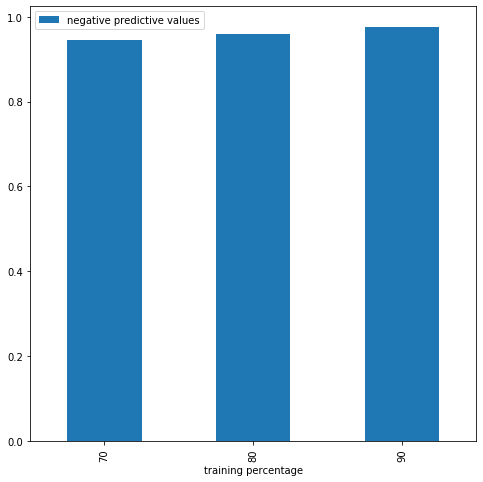

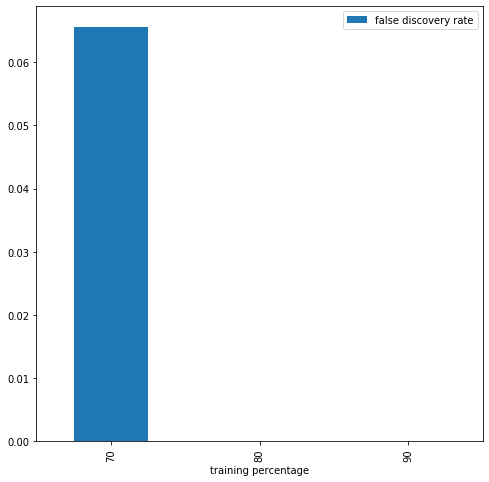

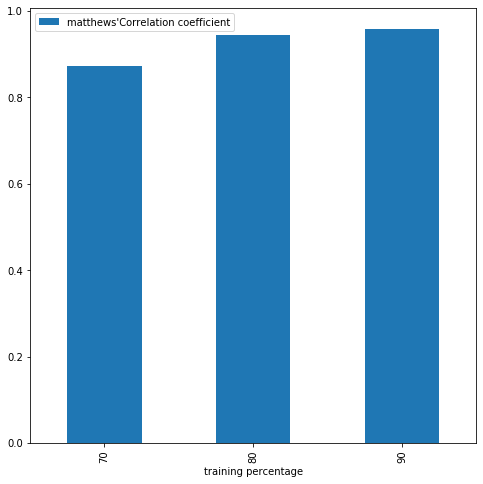

In [25]:
#This funtion plots graphs for all the different evaluation parameters against different training data percentages

def plot_graph(data_frame,column_list):
    for i in range(1,len(column_list)):
        data_frame.plot.bar('training percentage',column_list[i])

plot_graph(evaluation_df,column_list)

### Finding a correct algorithm for loss analysis

In [26]:
def CrossEntropy(yHat, y): #This cannot be used as log 0 is infinity yHat = y_pred
    if y == 1:
        return -(math.log(yHat))
    else:
        return -(math.log(1 - yHat))
c = CrossEntropy(1,1)

In [27]:
x = x.values
#Encoding categorical data (y_test and y_pred)
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

#Create and split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Fit our training model into the Gaussian classifier
classifier = GaussianNB()
classifier.fit(x_train,y_train)

#Store the predicted output of the testing feature set in variable 'y_pred'
y_pred = classifier.predict(x_test)


In [28]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [29]:
y_test

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [30]:
from sklearn.metrics import mean_squared_error      #This can be used
mse = mean_squared_error(y_pred,y_test)

In [31]:
mse  ##for 80:20

0.02631578947368421

In [32]:
#x = x.values
#Encoding categorical data (y_test and y_pred)
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

#Create and split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#Fit our training model into the Gaussian classifier
classifier = GaussianNB()
classifier.fit(x_train,y_train)

#Store the predicted output of the testing feature set in variable 'y_pred'
y_pred = classifier.predict(x_test)

from sklearn.metrics import mean_squared_error      #This can be used
mse = mean_squared_error(y_pred,y_test)

mse  #for 70:30

0.05847953216374269

In [33]:
#x = x.values
#Encoding categorical data (y_test and y_pred)
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

#Create and split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

#Fit our training model into the Gaussian classifier
classifier = GaussianNB()
classifier.fit(x_train,y_train)

#Store the predicted output of the testing feature set in variable 'y_pred'
y_pred = classifier.predict(x_test)

from sklearn.metrics import mean_squared_error      #This can be used
mse = mean_squared_error(y_pred,y_test)

mse  #for 90:10

0.017543859649122806

### Confusion matrix for each training data percentage

In [34]:
#We now display confusion matrices for each training data percentage to get a better understanding of the results
#In this fucntion, we fit our data set into the model according to the training data percentage and calculate y_pred which is a required parameter for confusion matrices

def Compute_y_pred(x,y,value):
    
    t_size = (100-int(value))/100
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=t_size, random_state=42)    #Create and split dataset into training and testing sets

    #Fit our training model into the Gaussian classifier
    classifier = GaussianNB()
    classifier.fit(x_train,y_train)

    #Store the predicted output of the testing feature set in variable 'y_pred'
    y_pred = classifier.predict(x_test)
    
    return y_pred

In [35]:
#Function to calculate y_test

def Compute_y_test(x,y,value):
    t_size = (100-int(value))/100
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=t_size, random_state=42) #Create and split dataset into training and testing sets
    
    return y_test

In [36]:
#Function to print the confusion matrices

def Print_cm(x,y,training_per):
    for i in training_per:
        t_size = (100-int(i))/100
        
        cm = confusion_matrix(Compute_y_test(x,y,i),Compute_y_pred(x,y,i))
        sns.heatmap(cm/np.sum(cm),annot=True,cmap="binary")
        
        plt.title('Confusion Matrix Gaussian Bayes; Test Set Ratio: {}'.format(t_size)+"\n")
        plt.xlabel('True class')
        plt.ylabel('Predicted class')
        plt.show()
        
        tp, fp, fn, tn = confusion_matrix(Compute_y_test(x,y,i),Compute_y_pred(x,y,i)).ravel()
        sum_ = tn+fp+fn+tp
        tn_per = round(tn/sum_*100,2)
        fp_per = round(fp/sum_*100,2)
        fn_per = round(fn/sum_*100,2)
        tp_per = round(tp/sum_*100,2)
        print("True Positives: ",tp," True Positives %: ",tp_per)
        print("False Negatives: ",fn," False Negatives %: ",fn_per)
        print("False Positives: ",fp," Flase Positives %: ",fp_per)
        print("True Negatives: ",tn," True Negatives %: ",tn_per)
        print("Accurately predicted % :", (tp_per+tn_per))
        print("\n")
        print("\n")

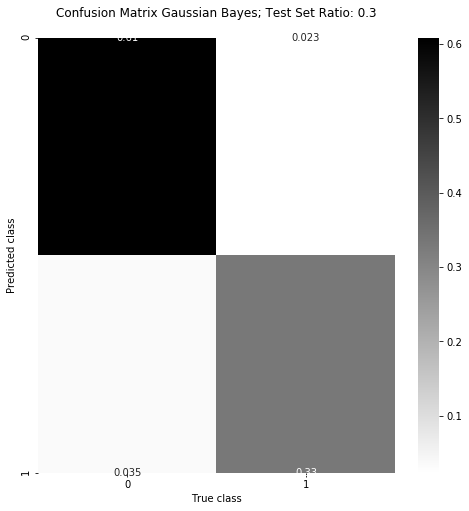

True Positives:  104  True Positives %:  60.82
False Negatives:  6  False Negatives %:  3.51
False Positives:  4  Flase Positives %:  2.34
True Negatives:  57  True Negatives %:  33.33
Accurately predicted % : 94.15






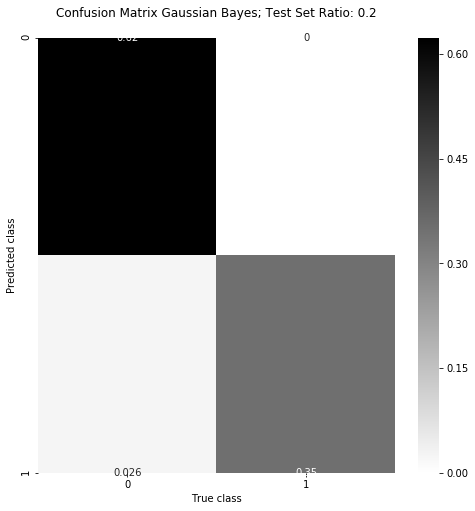

True Positives:  71  True Positives %:  62.28
False Negatives:  3  False Negatives %:  2.63
False Positives:  0  Flase Positives %:  0.0
True Negatives:  40  True Negatives %:  35.09
Accurately predicted % : 97.37






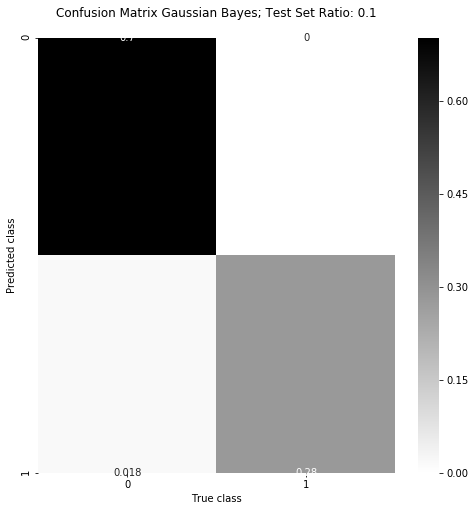

True Positives:  40  True Positives %:  70.18
False Negatives:  1  False Negatives %:  1.75
False Positives:  0  Flase Positives %:  0.0
True Negatives:  16  True Negatives %:  28.07
Accurately predicted % : 98.25






In [37]:
Print_cm(x,y,training_per)

## Applying  ANN to the dataset

In [38]:
#We are using artificial neural networks(ANN) to compile our model and get data about the accuracy and loss
#Import tensorflow as a package to implement ANN
import tensorflow as tf      

#This function will create a neural network of 3 layers and give us information about the accuracy of our model
def get_compiled_model():
    ann = tf.keras.models.Sequential()
    ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return ann

### Accuracy and loss curve for train data = 70%

In [39]:
model = get_compiled_model()
history = model.fit(x ,y,validation_split = 0.3, batch_size = 32, epochs = 100)

Train on 398 samples, validate on 171 samples
Epoch 1/100
398/398 [==============================] - 5s 12ms/sample - loss: 36.2175 - accuracy: 0.4347 - val_loss: 20.2631 - val_accuracy: 0.2281
Epoch 2/100
398/398 [==============================] - 0s 483us/sample - loss: 12.0428 - accuracy: 0.2915 - val_loss: 7.0812 - val_accuracy: 0.0877
Epoch 3/100
398/398 [==============================] - 0s 323us/sample - loss: 6.7092 - accuracy: 0.3719 - val_loss: 5.2496 - val_accuracy: 0.1637
Epoch 4/100
398/398 [==============================] - 0s 337us/sample - loss: 4.7083 - accuracy: 0.3593 - val_loss: 5.2102 - val_accuracy: 0.2164
Epoch 5/100
398/398 [==============================] - 0s 313us/sample - loss: 4.3001 - accuracy: 0.3945 - val_loss: 4.4826 - val_accuracy: 0.2573
Epoch 6/100
398/398 [==============================] - 0s 335us/sample - loss: 3.5177 - accuracy: 0.4548 - val_loss: 3.0899 - val_accuracy: 0.3801
Epoch 7/100
398/398 [==============================] - 0s 303us/sample

398/398 [==============================] - 0s 382us/sample - loss: 0.4547 - accuracy: 0.8794 - val_loss: 0.4492 - val_accuracy: 0.8713
Epoch 57/100
398/398 [==============================] - 0s 434us/sample - loss: 0.4342 - accuracy: 0.8769 - val_loss: 0.5088 - val_accuracy: 0.8480
Epoch 58/100
398/398 [==============================] - 0s 366us/sample - loss: 0.4025 - accuracy: 0.8945 - val_loss: 0.4684 - val_accuracy: 0.8713
Epoch 59/100
398/398 [==============================] - 0s 406us/sample - loss: 0.3914 - accuracy: 0.8995 - val_loss: 0.4526 - val_accuracy: 0.8772
Epoch 60/100
398/398 [==============================] - 0s 374us/sample - loss: 0.4204 - accuracy: 0.8945 - val_loss: 0.4597 - val_accuracy: 0.8713
Epoch 61/100
398/398 [==============================] - 0s 353us/sample - loss: 0.4040 - accuracy: 0.8970 - val_loss: 0.4536 - val_accuracy: 0.8655
Epoch 62/100
398/398 [==============================] - 0s 269us/sample - loss: 0.3817 - accuracy: 0.9020 - val_loss: 0.5037 

In [40]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


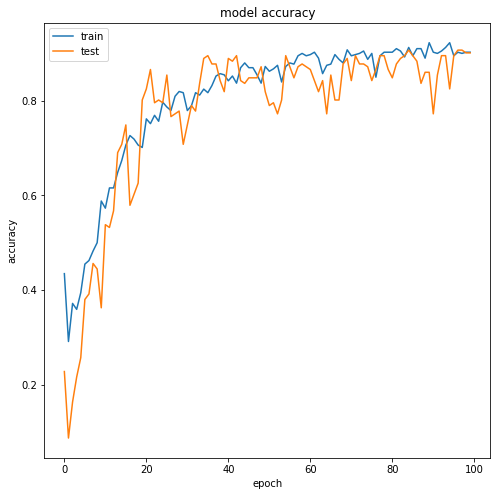

In [41]:
#Summarize and plot history for accuracy of train set vs test set

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()

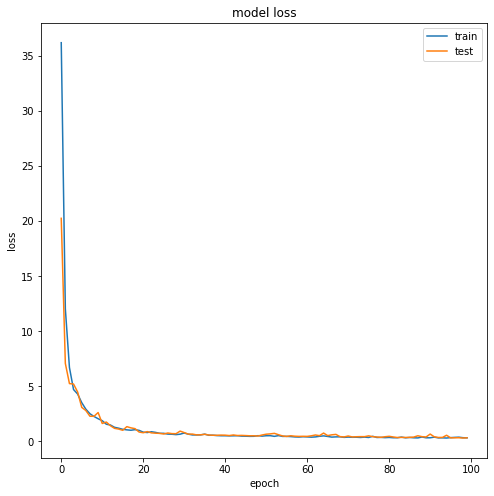

In [42]:
#Summarize and plot history for loss of train set vs test set
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper right')
plt.show()

### Accuracy and loss curve for train data = 80%

In [43]:
model = get_compiled_model()
history = model.fit(x ,y ,validation_split = 0.2, batch_size = 32, epochs = 100)

Train on 455 samples, validate on 114 samples
Epoch 1/100
455/455 [==============================] - 2s 5ms/sample - loss: 200.3921 - accuracy: 0.5912 - val_loss: 103.4691 - val_accuracy: 0.7719
Epoch 2/100
455/455 [==============================] - 0s 321us/sample - loss: 133.4381 - accuracy: 0.5912 - val_loss: 68.8765 - val_accuracy: 0.7719
Epoch 3/100
455/455 [==============================] - 0s 258us/sample - loss: 85.8338 - accuracy: 0.5912 - val_loss: 39.9206 - val_accuracy: 0.7719
Epoch 4/100
455/455 [==============================] - 0s 319us/sample - loss: 43.9161 - accuracy: 0.5912 - val_loss: 14.6280 - val_accuracy: 0.7456
Epoch 5/100
455/455 [==============================] - 0s 293us/sample - loss: 10.1759 - accuracy: 0.5143 - val_loss: 6.5903 - val_accuracy: 0.2544
Epoch 6/100
455/455 [==============================] - 0s 311us/sample - loss: 5.9270 - accuracy: 0.3824 - val_loss: 5.6745 - val_accuracy: 0.2719
Epoch 7/100
455/455 [==============================] - 0s 282u

455/455 [==============================] - 0s 322us/sample - loss: 0.3536 - accuracy: 0.8923 - val_loss: 0.4745 - val_accuracy: 0.7807
Epoch 57/100
455/455 [==============================] - 0s 274us/sample - loss: 0.3673 - accuracy: 0.8637 - val_loss: 0.3450 - val_accuracy: 0.8684
Epoch 58/100
455/455 [==============================] - 0s 320us/sample - loss: 0.3579 - accuracy: 0.8857 - val_loss: 0.4456 - val_accuracy: 0.7895
Epoch 59/100
455/455 [==============================] - 0s 256us/sample - loss: 0.3552 - accuracy: 0.8835 - val_loss: 0.4022 - val_accuracy: 0.8158
Epoch 60/100
455/455 [==============================] - 0s 318us/sample - loss: 0.3467 - accuracy: 0.8681 - val_loss: 0.3560 - val_accuracy: 0.8158
Epoch 61/100
455/455 [==============================] - 0s 265us/sample - loss: 0.3353 - accuracy: 0.8945 - val_loss: 0.4382 - val_accuracy: 0.7982
Epoch 62/100
455/455 [==============================] - 0s 312us/sample - loss: 0.3373 - accuracy: 0.8659 - val_loss: 0.3475 

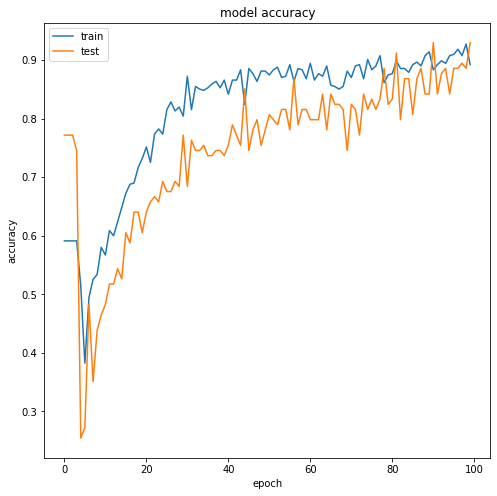

In [44]:
#Summarize and plot history for accuracy of train set vs test set

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()

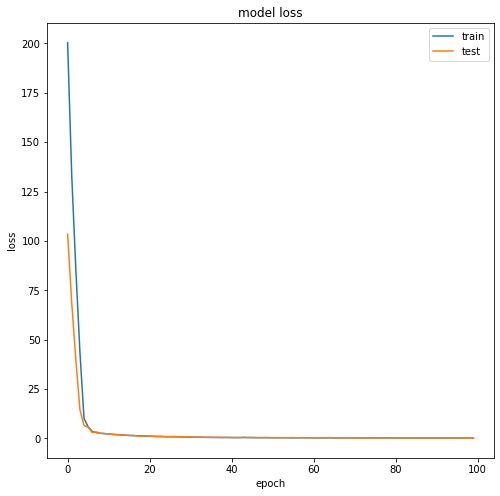

In [45]:
#Summarize and plot history for loss of train set vs test set

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper right')
plt.show()

### Accuracy and loss curve for train data = 90%

In [46]:
model = get_compiled_model()
history = model.fit(x ,y,validation_split = 0.1, batch_size = 32, epochs = 100)

Train on 512 samples, validate on 57 samples
Epoch 1/100
512/512 [==============================] - 2s 5ms/sample - loss: 61.4830 - accuracy: 0.6133 - val_loss: 36.6232 - val_accuracy: 0.7544
Epoch 2/100
512/512 [==============================] - 0s 305us/sample - loss: 45.0711 - accuracy: 0.6133 - val_loss: 24.8977 - val_accuracy: 0.7544
Epoch 3/100
512/512 [==============================] - 0s 280us/sample - loss: 25.1711 - accuracy: 0.6113 - val_loss: 7.7715 - val_accuracy: 0.6842
Epoch 4/100
512/512 [==============================] - 0s 225us/sample - loss: 4.6624 - accuracy: 0.4941 - val_loss: 4.5015 - val_accuracy: 0.2632
Epoch 5/100
512/512 [==============================] - 0s 285us/sample - loss: 2.5019 - accuracy: 0.5527 - val_loss: 2.0153 - val_accuracy: 0.5439
Epoch 6/100
512/512 [==============================] - 0s 209us/sample - loss: 1.9740 - accuracy: 0.7129 - val_loss: 1.5344 - val_accuracy: 0.5614
Epoch 7/100
512/512 [==============================] - 0s 310us/sample

512/512 [==============================] - 0s 242us/sample - loss: 0.2321 - accuracy: 0.9082 - val_loss: 0.1672 - val_accuracy: 0.9649
Epoch 57/100
512/512 [==============================] - 0s 275us/sample - loss: 0.2340 - accuracy: 0.9082 - val_loss: 0.1577 - val_accuracy: 0.9474
Epoch 58/100
512/512 [==============================] - 0s 244us/sample - loss: 0.2252 - accuracy: 0.9023 - val_loss: 0.1849 - val_accuracy: 0.9298
Epoch 59/100
512/512 [==============================] - 0s 265us/sample - loss: 0.2304 - accuracy: 0.9121 - val_loss: 0.2073 - val_accuracy: 0.9298
Epoch 60/100
512/512 [==============================] - 0s 228us/sample - loss: 0.2241 - accuracy: 0.9160 - val_loss: 0.1591 - val_accuracy: 0.9298
Epoch 61/100
512/512 [==============================] - 0s 268us/sample - loss: 0.2182 - accuracy: 0.9121 - val_loss: 0.1545 - val_accuracy: 0.9474
Epoch 62/100
512/512 [==============================] - 0s 213us/sample - loss: 0.2203 - accuracy: 0.9121 - val_loss: 0.1686 

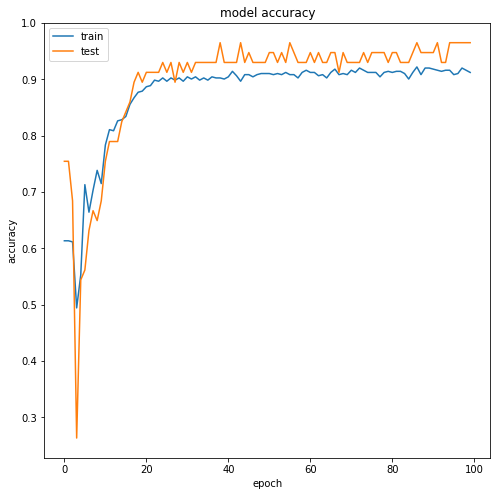

In [47]:
#Summarize and plot history for accuracy of train set vs test set

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()

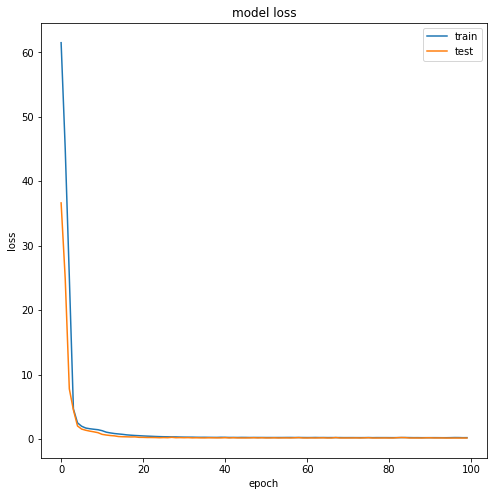

In [48]:
#Summarize and plot history for loss of train set vs test set

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper right')
plt.show()

### Plotting the ROC for different train test ratios

In [49]:
#This function plots the ROC curve
from sklearn.metrics import roc_auc_score
def Plot_ROC(y_test,y_pred,val):
    no_skill = [0 for _ in range(len(y_test))]
    nb_fpr, nb_tpr, _ = roc_curve(y_test,y_pred)
    ns_fpr, ns_tpr, _ = roc_curve(y_test,no_skill)
    plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes')
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for training percentage {}%'.format(val))
    plt.legend()
    plt.show()
    auc = roc_auc_score(y_test, y_pred)
    print('AUC: %.3f' % auc)

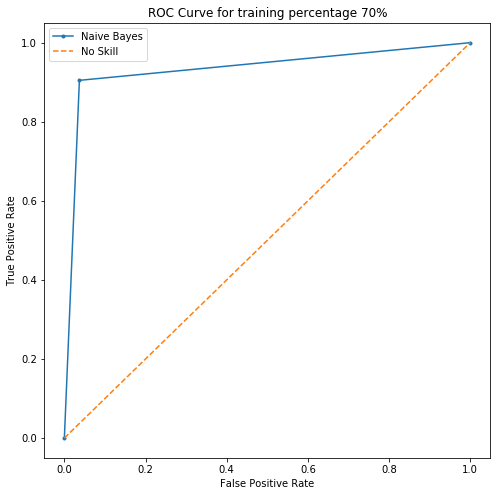

AUC: 0.934


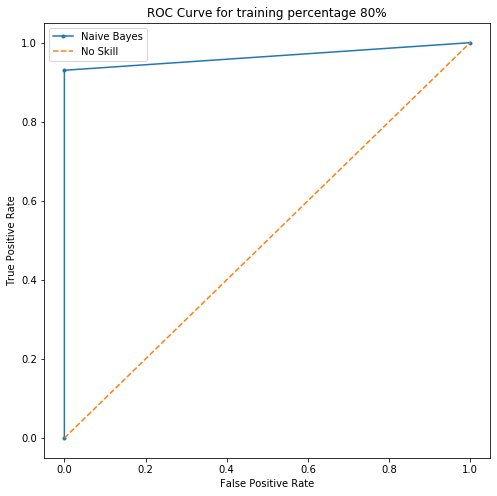

AUC: 0.965


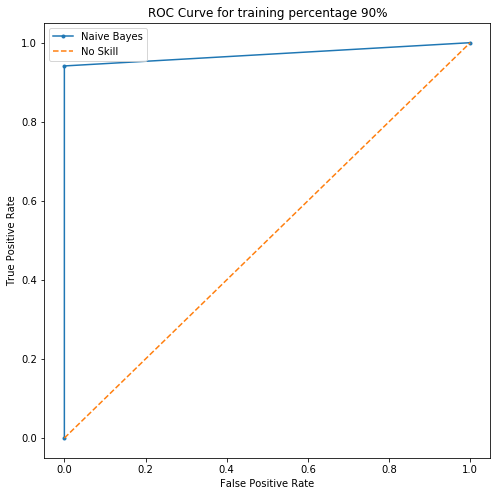

AUC: 0.971


In [50]:
for i in training_per:
    y_p = Compute_y_pred(x,y,i)
    y_t = Compute_y_test(x,y,i)
    Plot_ROC(y_t,y_p,i)

### plotting of loss function against training ratios

In [51]:
from sklearn.metrics import mean_squared_error #this can be used
def Calc_loss(x,y,value):
    mse = mean_squared_error(Compute_y_pred(x,y,value),Compute_y_test(x,y,value))
    return mse

In [52]:
mse_list = []
for i in training_per:
    m = Calc_loss(x,y,i)
    mse_list.append(m)

In [53]:
training_per

['70', '80', '90']

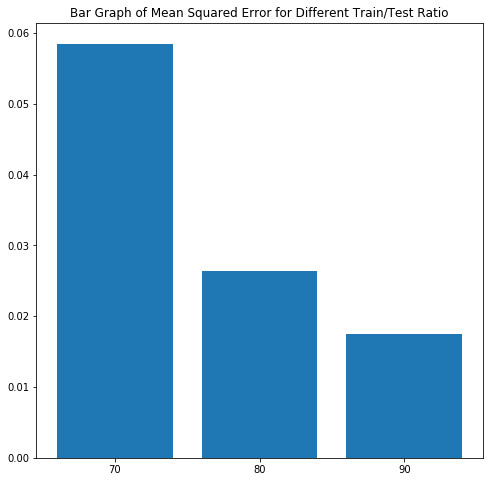

In [54]:
plt.bar(training_per,mse_list)
plt.title("Bar Graph of Mean Squared Error for Different Train/Test Ratio")
plt.show()

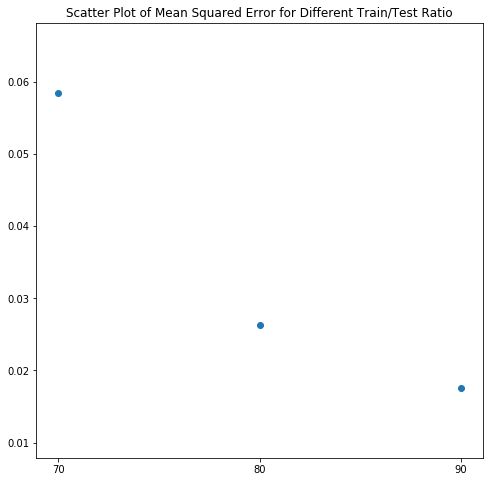

In [55]:
plt.scatter(training_per, mse_list)
plt.title("Scatter Plot of Mean Squared Error for Different Train/Test Ratio")
plt.show()